In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rdn

Bài 1: Fit model parabol linear regression cho dữ liệu: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_square.csv

In [2]:
data = pd.read_csv("data_square.txt")

In [3]:
data.tail()

,Diện tích,Giá nhà
25,90.3448,1127.71
26,92.7586,1328.30
27,95.1724,1540.55
28,97.5862,1764.45
29,100.0000,2000.00


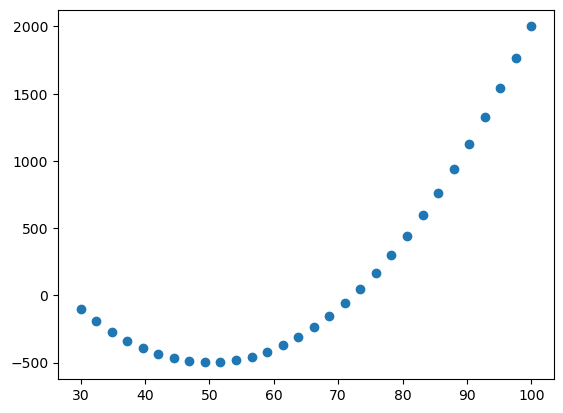

In [4]:
plt.scatter(x = data["Diện tích"], y= data["Giá nhà"])

In [5]:
class LinearModel:
    def __init__(self, data, x, y):
        self.data = data
        a = np.array([1]*len(data)) # array of 1s
        self.x = np.array([a, data[x],  np.power(data[x], 2)]).transpose()
        self.t = y
        xtx = (self.x).transpose().dot(self.x)
        self.model = np.linalg.inv(xtx).dot(self.x.transpose()).dot(data[y])
        
    def __repr__(self) -> str:
        return f"{self.model[0]:.3f} + {self.model[1]:.3f}x + {self.model[2]:.3f}x^2" 

    def predict(self, x):
        return self.model[0] + self.model[1] * x
    
    def plot(self, x, y):
        values = np.linspace(self.data[x].min(), self.data[x].max(), 100)
        plt.scatter(self.data[x], self.data[y])
        plt.xlabel = "mét vuông"
        plt.ylabel = "giá"
        plt.plot(values, self.model[0] + self.model[1] * values + self.model[2] * np.power(values, 2), color = "red")
        plt.show()
    

In [6]:
solution = LinearModel(data, "Diện tích", "Giá nhà")
print(solution)

2000.006 + -100.000x + 1.000x^2


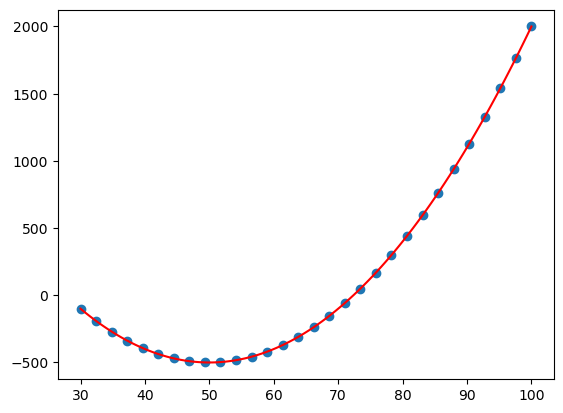

In [7]:
solution.plot("Diện tích", "Giá nhà")

In [8]:
solution.model

array([ 2.00000579e+03, -1.00000222e+02,  1.00000199e+00])

Bài 2: Tự sinh dữ liệu như ở hình dưới:

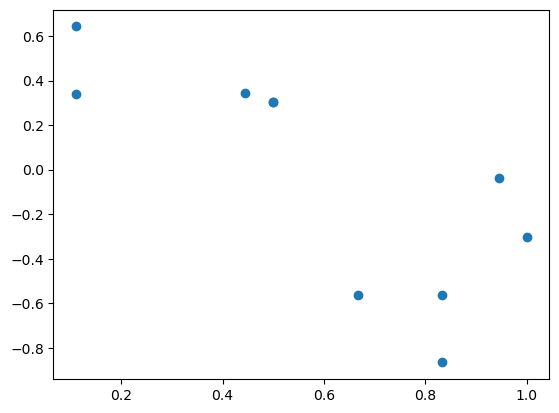

In [9]:
rdn.seed(82)
def generate_data(n):
    temp = np.linspace(0, 1, 19)
    x = rdn.choices(temp, k = n)
    t = pd.Series([np.sin(2*np.pi*i) + np.std(x) * rdn.choice([1, -1, 0]) for i in x])
    return pd.DataFrame({"x": x, "t":t})

data_10_points = generate_data(10)
plt.scatter(data_10_points["x"], data_10_points["t"])

In [10]:

class solution2:
    def __init__(self, data, x, y, power):
        self.data = data
        self.y = y
        self.power = power
        a = np.array([1]*len(data)) 
        self.x = [a]
        for i in range(1, power + 1):
            self.x.append(np.array(np.power(self.data[x], i)))
        self.x = np.array(self.x).transpose()
        xtx = (self.x).transpose().dot(self.x)
        self.model = np.linalg.inv(xtx).dot(self.x.transpose()).dot(data[y])
        
    def fit_new_data(self, new_data):
        self.data = new_data

    def predict(self, values):
        res = 0
        arr = np.array([])
        for i in range(0, self.power + 1):
            arr = np.append(arr, np.power(values, i))
        arr = arr.transpose()
        return arr.dot(self.model)
    
    def plot(self):
        variable = np.linspace(0, 1, 100)
        actual = [np.sin(2*np.pi*i) for i in variable]
        values = [self.predict(i) for i in variable]
        plt.scatter(self.data["x"], self.data["t"])
        plt.plot(variable, values, color = "r")
        plt.plot(variable, actual, color = "green")
        plt.legend(["predicted value", "sin(2pix)", "train value"])

    def ridge(self, alpha):
        xtx = (self.x).transpose().dot(self.x)
        return np.linalg.inv(xtx + np.identity(xtx.shape[0]).dot(alpha)).dot(self.x.transpose()).dot(self.data[self.y])
    
    def _predict_lasso(self, x):
        return x.dot(self.model) + self.b

    def lasso(self, learning_rate, lamda, iter):
        self.lamda = lamda
        self.iter = iter
        self.learning_rate = learning_rate
        self.m, self.n = self.x.shape
        self.model = np.zeros(self.n)
        self.b = 0
        for i in range(iter):
            self._update_w()
    
    def _update_w(self):
        t_pred = self._predict_lasso(self.x)
        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.model[i] > 0:
                dw[i] = (-(2*(self.x[:,i]).dot(self.data[self.y] - t_pred)) + self.lamda) / self.m 
            else:
                dw[i] = (-(2*(self.x[:,i]).dot(self.data[self.y] - t_pred)) - self.lamda) / self.m
        db = - 2 * np.sum(self.data[self.y] - t_pred) / self.m
    
        self.model = self.model - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    
    def get_model(self):
        return self.model
    
    

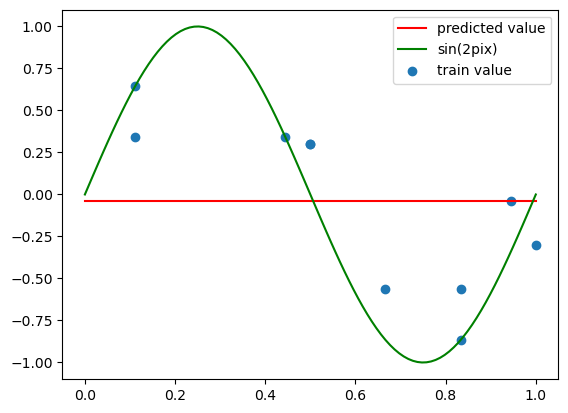

In [11]:
result = solution2(data_10_points, "x", "t", power=0)
result.plot()

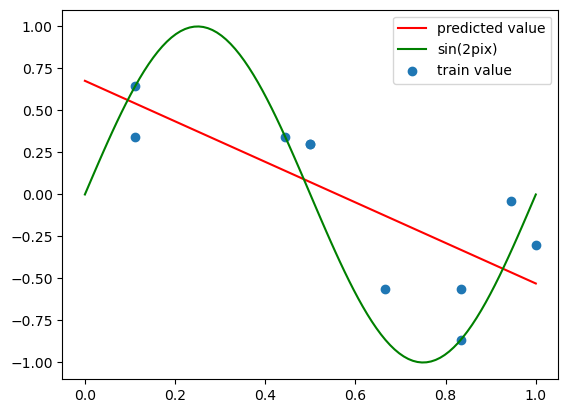

In [12]:
result = solution2(data_10_points, "x", "t", power=1)
result.plot()

Comment: model at power 0 and 1 gives poor fits to the data and gives poor representation of the function sin(2 pi x)

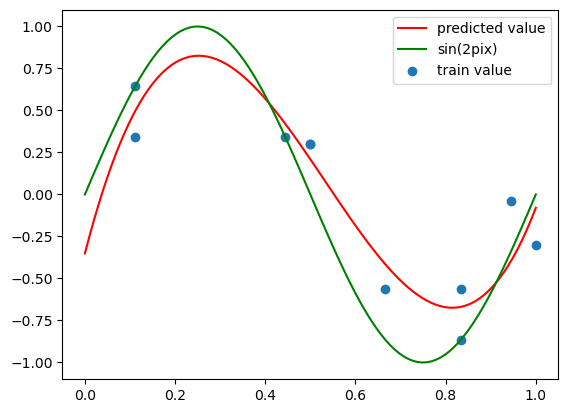

In [13]:
result = solution2(data_10_points, "x", "t", power=3)
result.plot()

Comment: model at power three gives relatively similar shape in comparison to the sin(2 pi x) curve, this may be the most suitable model if we know the information of the sin curve

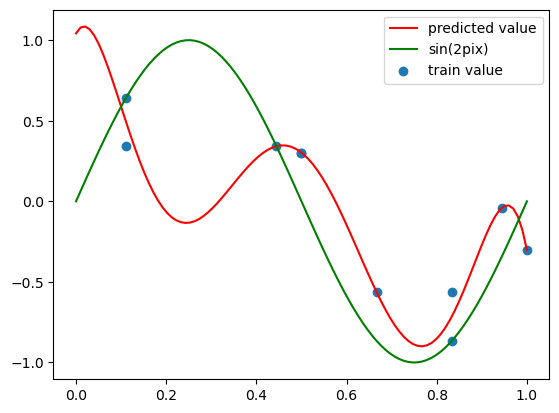

In [14]:
result = solution2(data_10_points, "x", "t", power=6)
result.plot()


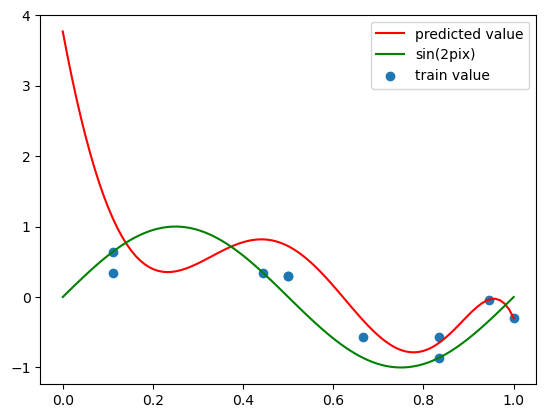

In [15]:
result = solution2(data_10_points, "x", "t", power=9)
result.plot()

Comment: as the power gets higher, the curves fits closer to the training data points but it is not of the same shape as the sin curve. this is due to overfitting

In [16]:
# solution 2b

def kfold(train_data):
    result = []
    res = None
    for i in range(10):
        validation = train_data[train_data["fold"] == i]
        train = train_data.drop(validation.index)
        model = solution2(train, "x", "t", power = 9)
        predicted = validation.apply(lambda row: model.predict(row["x"]), axis = 1)
        res = mse(model, validation)
        print(f"validation fold {i}: mean squared error: {res:.3f}")
        result.append(np.mean(res))
    # return result

def mse(model, test):
    predicted = test.apply(lambda row: model.predict(row["x"]), axis = 1)
    result = np.mean(np.power(test["t"] - predicted,2))
    return result

def predict(model, values):
    res = 0
    arr = np.array([])
    for i in range(0, 9 + 1):
        arr = np.append(arr, np.power(values, i))
    arr = arr.transpose()
    return arr.dot(model)

In [17]:
# generate data and split train and test set
data_25_points = generate_data(25)
data_25_points_train = data_25_points.sample(frac = 0.8)
data_25_points_test = data_25_points.drop(index = data_25_points_train.index)
k_size = len(data_25_points)/10
fold = np.repeat(np.array(range(0,10)), k_size)
np.random.shuffle(fold)
data_25_points_train["fold"] = fold

In [18]:
train_25 = solution2(data_25_points_train, "x", "t", power=9)
train_25.get_model()

array([ 1.67204998e-02, -2.47852986e+00,  2.12175864e+02, -2.21229447e+03,
        1.08235227e+04, -2.90788320e+04,  4.44915089e+04, -3.82661344e+04,
        1.70490529e+04, -3.01624340e+03])

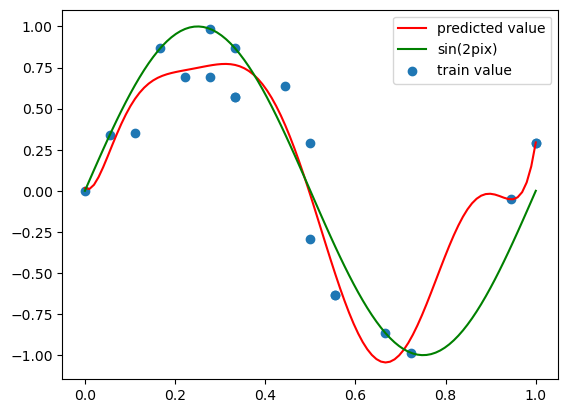

In [19]:
train_25.plot()

In [20]:
kfold(data_25_points_train)

validation fold 0: mean squared error: 0.076
validation fold 1: mean squared error: 0.017
validation fold 2: mean squared error: 0.104
validation fold 3: mean squared error: 0.149
validation fold 4: mean squared error: 0.865
validation fold 5: mean squared error: 0.009
validation fold 6: mean squared error: 0.052
validation fold 7: mean squared error: 0.102
validation fold 8: mean squared error: 664.148
validation fold 9: mean squared error: 12.535


In [21]:
compare = data_25_points_test.copy()
compare["predicted"] = compare.apply(lambda row: train_25.predict(row["x"]), axis = 1)
compare

,x,t,predicted
7,0.277778,1.278394,0.762714
12,0.388889,0.642788,0.665234
13,0.666667,-0.866025,-1.044596
16,0.000000,-0.293586,0.016720
22,0.000000,0.000000,0.016720


In [22]:
train_25.fit_new_data(data_25_points_test)

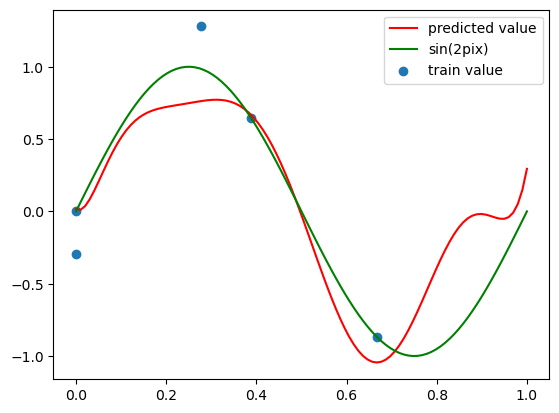

In [23]:
train_25.plot()

the mse in each fold is quite high, and the prediction for the test set is not correct. In conlusion, the model is still over-fitted to the training data set, however, the shape of the predicted curve gets closer to the sin curve

In [24]:
data_125_points = generate_data(125)
data_125_points_train = data_125_points.sample(frac = 0.8)
data_125_points_test = data_125_points.drop(index = data_125_points_train.index)
k_size = len(data_125_points_train)/10
fold = np.repeat(np.array(range(0,10)), k_size)
np.random.shuffle(fold)
data_125_points_train["fold"] = fold

In [25]:
data_125_points_train.tail()

,x,t,fold
80,0.222222,6.744614e-01,0
115,1.000000,-2.449294e-16,9
117,0.777778,-9.848078e-01,5
2,0.055556,3.167378e-02,7
70,0.722222,-9.848078e-01,5


In [26]:
data_125_points_test.tail()

,x,t
92,1.000000,-3.103464e-01
96,0.833333,-8.660254e-01
101,1.000000,3.103464e-01
102,0.166667,1.176372e+00
123,1.000000,-2.449294e-16


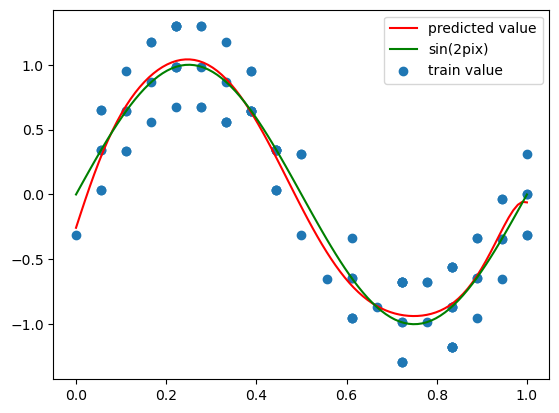

In [27]:
train_125 = solution2(data_125_points_train, "x", "t", power = 9)
train_125.plot()

In [28]:
kfold(data_125_points_train)

validation fold 0: mean squared error: 0.113
validation fold 1: mean squared error: 0.099
validation fold 2: mean squared error: 0.114
validation fold 3: mean squared error: 0.080
validation fold 4: mean squared error: 0.060
validation fold 5: mean squared error: 0.052
validation fold 6: mean squared error: 0.041
validation fold 7: mean squared error: 0.047
validation fold 8: mean squared error: 1.129
validation fold 9: mean squared error: 0.064


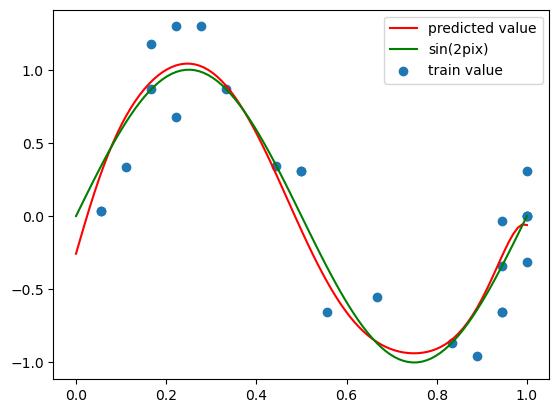

In [29]:
train_125.fit_new_data(data_125_points_test)
train_125.plot()

the mse for each fold is significantly lower than that of the case of 25 data points and the predicted curve from the test set is similar to the sin curve. The model is now giving a fairly accurate prediction.

## fit đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge và Lasso để tránh overfitting

explain problem 2c(ridge and lasso): https://github.com/DDKson/machine-learning-dseb62/blob/week-4/ML_dseb62_w4___Nguyen_Tuan_Duy%20(1).pdf

In [30]:
model = solution2(data_10_points, "x", "t", power = 9)

[ 1.86844329e-01 -5.97764438e-01 -5.85999871e-01 -3.51997142e-01
 -9.09078602e-02 -9.39489608e-05  1.87980818e-02  1.46011621e-01
  2.54468195e-01  3.38105320e-01]


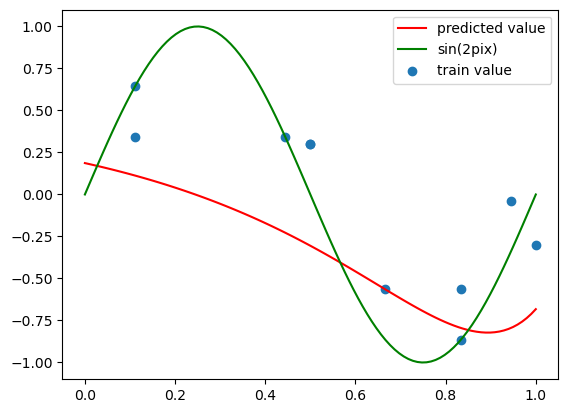

In [31]:
# lasso regression
model.lasso(learning_rate=0.2, lamda=0.1, iter = 100)
print(model.get_model())
model.plot()

[ 1.05958171 -1.73958145 -0.81391805 -0.18150554  0.1049258   0.22156148
  0.27032198  0.29832073  0.32517097  0.35784454]


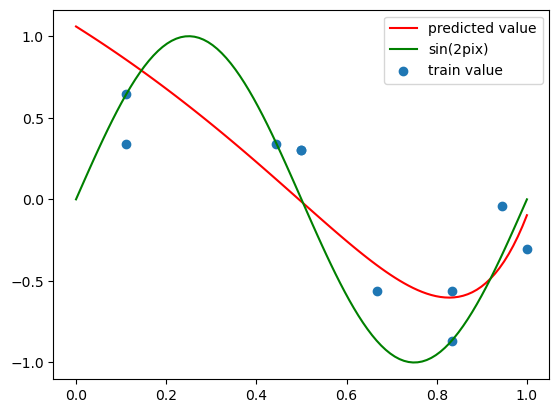

In [32]:
# ridge regression
model.model = model.ridge(-0.1)
print(model.get_model())
model.plot()